In [11]:
### Title: Comparing Traffic Stop Data in Austin to Gentrification Data to Determine Correlation

Team Members: Julian Gawel (jrg5766), Ejine Uzor (eu2338), Kabir Chadha (ksc2374)

SyntaxError: invalid syntax (<ipython-input-11-c7b0b1861512>, line 3)

In [12]:
### importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier as DCT
from sklearn import tree

import time

Research Question: Using Austin Police Department profiling data and The Uprooted Project gentrification data is there a link between traffic stop searches and areas undergoing gentrification? 

For our project, we decided to use a dataset (that can be found at: https://catalog.data.gov/dataset/2018-rp-arrests) and information from a 2018 study (that can be found at: https://sites.utexas.edu/gentrificationproject/..austin-uprooted-report-maps/) to compare the number of stops made by police in locations in Travis and Williamson County that are identified as becoming rapidly gentrified. The dataset in question provides us with the following information: date/time of the police stop, location of where the stop occurred (both the physical address and the x and y coordinate locations, the APD sector responsible for the stop, the Council District and county description, zip code, census tract, whether or not the race of the offender was known prior to the stop, the initial reason for the traffic stop, the offender’s sex, the race description of the APD officer responsible for the stop, whether or not the offender was searched and if so, what the reason for that search was, and lastly what was found during the search. With this information, we hope to compare traffic stop information in different zip-codes around Austin. We then hope to use the results of a study run by the Uprooted Project at UT Austin to determine whether there is a significant difference in the traffic stops made in zip-codes that are becoming more gentrified vs. those that are not.

Hypothesis: We will consider our model a success if it achieves 70% accuracy. We will determine this by creating an accuracy helper function to evaluate the correctness of predictions. We expect to see certain zip codes, those pertaining to the gentrifying areas identified by the Uprooted Project, to have higher rates of traffic stop searches towards minorities and conversely lower rates of searches in more affluent zip codes. We expect that our Decision Tree Classification Model will make accurate decisions reflecting the disparity in traffic stop searches due to zip code and race, showing a link between increased traffic stop searches and gentrification. 

In [13]:
df = pd.read_csv("2018_RP_Arrests.csv")


df

,PRIMARY_KEY,REP_DATE,REP_TIME,LOCATION,X_COORDINATE,Y_COORDINATE,APD_sector,CouncilDistrict,county_description,ZIP,CENSUS_TRACT,RACE_KNOWN,Reason for Stop – TCOLE form,SEX,APD_RACE_DESC,Person Search YN,Search Based On,Search Found
0,2018851492,03/26/2018,2010,900 BARTON SPRINGS RD,3110900.0,10067827.0,DA,Council District 9,TRAVIS COUNTY,78704.0,13.05,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Violation of law other than traffic,F,WHITE,YES,INCIDENTAL TO ARREST,NOTHING
1,20183380603,12/04/2018,1032,W 14TH ST / LAVACA ST,3114407.0,10073883.0,BA,Council District 1,TRAVIS COUNTY,78701.0,7.00,NaN,Moving Traffic Violation,M,BLACK,NO,NaN,NaN
2,2018220493,01/22/2018,930,BARWOOD PARK / N IH 35 SVRD SB,3128801.0,10100276.0,ED,Council District 4,TRAVIS COUNTY,78753.0,18.06,NaN,Moving Traffic Violation,F,BLACK,NO,NaN,NaN
3,20183570460,12/23/2018,906,2400 BLOCK WICKERSHAM LN,3120814.0,10056202.0,HE,Council District 3,TRAVIS COUNTY,78741.0,23.14,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,M,BLACK,YES,INCIDENTAL TO ARREST,NOTHING
4,201870517,01/07/2018,1017,6900 CARVER AVE,3126863.0,10092793.0,ID,Council District 4,TRAVIS COUNTY,78752.0,18.12,NaN,Moving Traffic Violation,M,BLACK,NO,NaN,NaN
5,2018331919,02/02/2018,2359,2107 S CONGRESS AVE,3111599.0,10061552.0,HE,Council District 9,TRAVIS COUNTY,78704.0,14.01,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,M,HISPANIC OR LATINO,YES,INCIDENTAL TO ARREST,NOTHING
6,20183521336,12/18/2018,1841,E WILLIAM CANNON DR / S CONGRESS AVE,3103555.0,10043201.0,FR,Council District 2,TRAVIS COUNTY,78745.0,24.22,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,M,BLACK,YES,INCIDENTAL TO ARREST,NOTHING
7,20183340180,11/30/2018,255,E 6TH ST / CONGRESS AVE,3114309.0,10070753.0,GE,Council District 9,TRAVIS COUNTY,78701.0,11.00,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,M,HISPANIC OR LATINO,YES,INCIDENTAL TO ARREST,OTHER
8,20183490064,12/15/2018,38,3900 TODD LN,3116752.0,10050802.0,FR,Council District 2,TRAVIS COUNTY,78744.0,24.11,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Violation of law other than traffic,M,BLACK,YES,INCIDENTAL TO ARREST,CASH
9,2018621529,03/04/2018,207,6700 BLOCK N IH 35 SVRD SB,3125109.0,10092138.0,ID,Council District 4,TRAVIS COUNTY,78752.0,15.03,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,F,BLACK,YES,INCIDENTAL TO ARREST,NOTHING


Cleaning Up Data

Below we have 5 functions which are used to aid in cleaning up our dataset. We created standardized date to get our date column into unix format, reason num to number code the various reasons for traffic stops/arrests, council num to remove the string ‘council num’ from each row, and race num to number code different races.


Dropping Rows & Columns

While cleaning up our dataset, we also dropped all the columns that were unnecessary for our prediction and correlation analysis. Below, we dropped the primary key, x and y coordinate, location, county description, search based on, and search found columns. We also removed all rows with n/a values for Council District and Race. We also randomly selected 2000 rows to be included in our dataframe to meet the project requirements.


In [14]:
### Converts the REP_DATE and REP_TIME columns into unix time
def standardize_date(d):
    m, d, y, t = d.split('/')
    if len(t) < 3:
        h = 0
        mi = t
    else:
        mi = str(t[-2:])
        h = t[:-2]
    new_date = time.strptime(str(y+'/'+m+'/'+d+' '+str(h)+':'+mi+':00'), '%Y/%m/%d %H:%M:%S')
    return new_date

    # Convert String values into numerical values for computation
def known_num(x):
    if x != 'YES - RACE OR ETHNICITY WAS KNOWN BEFORE STOP':
        return 0
    else:
        return 1
def reason_num(x):
    if x[0] == 'M':
        return 0
    else:
        return 1
def council_num(x):
    if x[-1] == 0:
        return 10
    else:
        return x[-1]
def race_num(x):
    if x[0] == "H":
        if x[1] == 'I':
            return 0
        else:
            return 4
    elif x[0] == 'W':
        return 7
    elif x[0] == 'B':
        return 2
    elif x[0] == 'A':
        if x[1] == 'S':
            return 5
        else:
            return 1
    elif x[0] =='M':
        return 3
    else:
        return 6

In [15]:
df = df.loc[df['Reason for Stop – TCOLE form']!= 'Pre-existing knowledge (i.e. warrant)']

#Applying 
df['DateTime'] = df['REP_DATE']+'/'+df['REP_TIME'].astype(str)
df['DateTime'] = df['DateTime'].apply( lambda x : standardize_date(x))
df['Unix'] = df['DateTime'].apply(lambda x: time.mktime(x))

#Remove columns not relevant to the algorithm, either being related to an unneccesary feature or identical throughout
dfX = df.drop(columns = ['X_COORDINATE','Y_COORDINATE','LOCATION','PRIMARY_KEY','REP_DATE','REP_TIME','DateTime','county_description','Search Based On','Search Found'])
dfX=dfX.dropna(subset = ['CouncilDistrict','APD_RACE_DESC'])

dfX['SEX']=dfX['SEX'].replace({'M':0,'F':1,'U':2})
dfX['Person Search YN']=dfX['Person Search YN'].replace({'YES':1,'NO':0})
dfX["RACE_KNOWN"] = dfX["RACE_KNOWN"].apply(lambda x: known_num(x))

dfX['CouncilDistrict']= dfX['CouncilDistrict'].apply(lambda x:council_num(x))
dfX['APD_RACE_DESC'] = dfX['APD_RACE_DESC'].apply(lambda x: race_num(x))
dfX['Reason for Stop – TCOLE form']= dfX['Reason for Stop – TCOLE form'].apply(lambda x: reason_num(x))
dfX['APD_sector'] = dfX['APD_sector'].replace({'ED':0,'CH':1,'ID':2,'DA':3,'HE':4,'FR':5,'BA':6,'AD':7,'GE':8,'AP':9,'88':10})
dfX=dfX.dropna()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

Splitting Data

We split our target and feature datasets into train and test sets to allow us to test and judge the accuracy of our model. Given we are predicting whether or not an individual is searched, our target column is 'Person Search YN'.


In [16]:
working = dfX.sample(n = 2000,random_state = 999).reset_index(drop=True)

df_x = working.drop(columns = ['Person Search YN','APD_sector','Unix','CENSUS_TRACT','CouncilDistrict','RACE_KNOWN'])
df_y = pd.Series(working['Person Search YN'])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size = 0.25, random_state = 99)

Here, we called the decision tree classifier function and fit it to our train dataset for target and feature variables. The decision tree below helps us split up the data in the most informative way to accurately predict our target model. Looking at our root node, we see that Reason For Stop <= 1.5 is the most informative condition. This means we can draw the most insights from this condition when broken down. If that condition is true for our sample data, we will look at 1138 samples on the left branch of the tree. If false, we look into 362 samples on the right branch. From this, the decision tree repeats the process of splitting and segmenting the data using subsequent conditions while utilizing the gini ratio to end the process. The process of splitting the data ends when we reach the purest nodes (aka Leaf nodes). Visualized below we see that the decision tree model stops where our gini ratio = 0. We also see that our model has an accuracy of 80% Which shows us that it is a strong predictor model for whether a person in searched.

Acc: 0.8


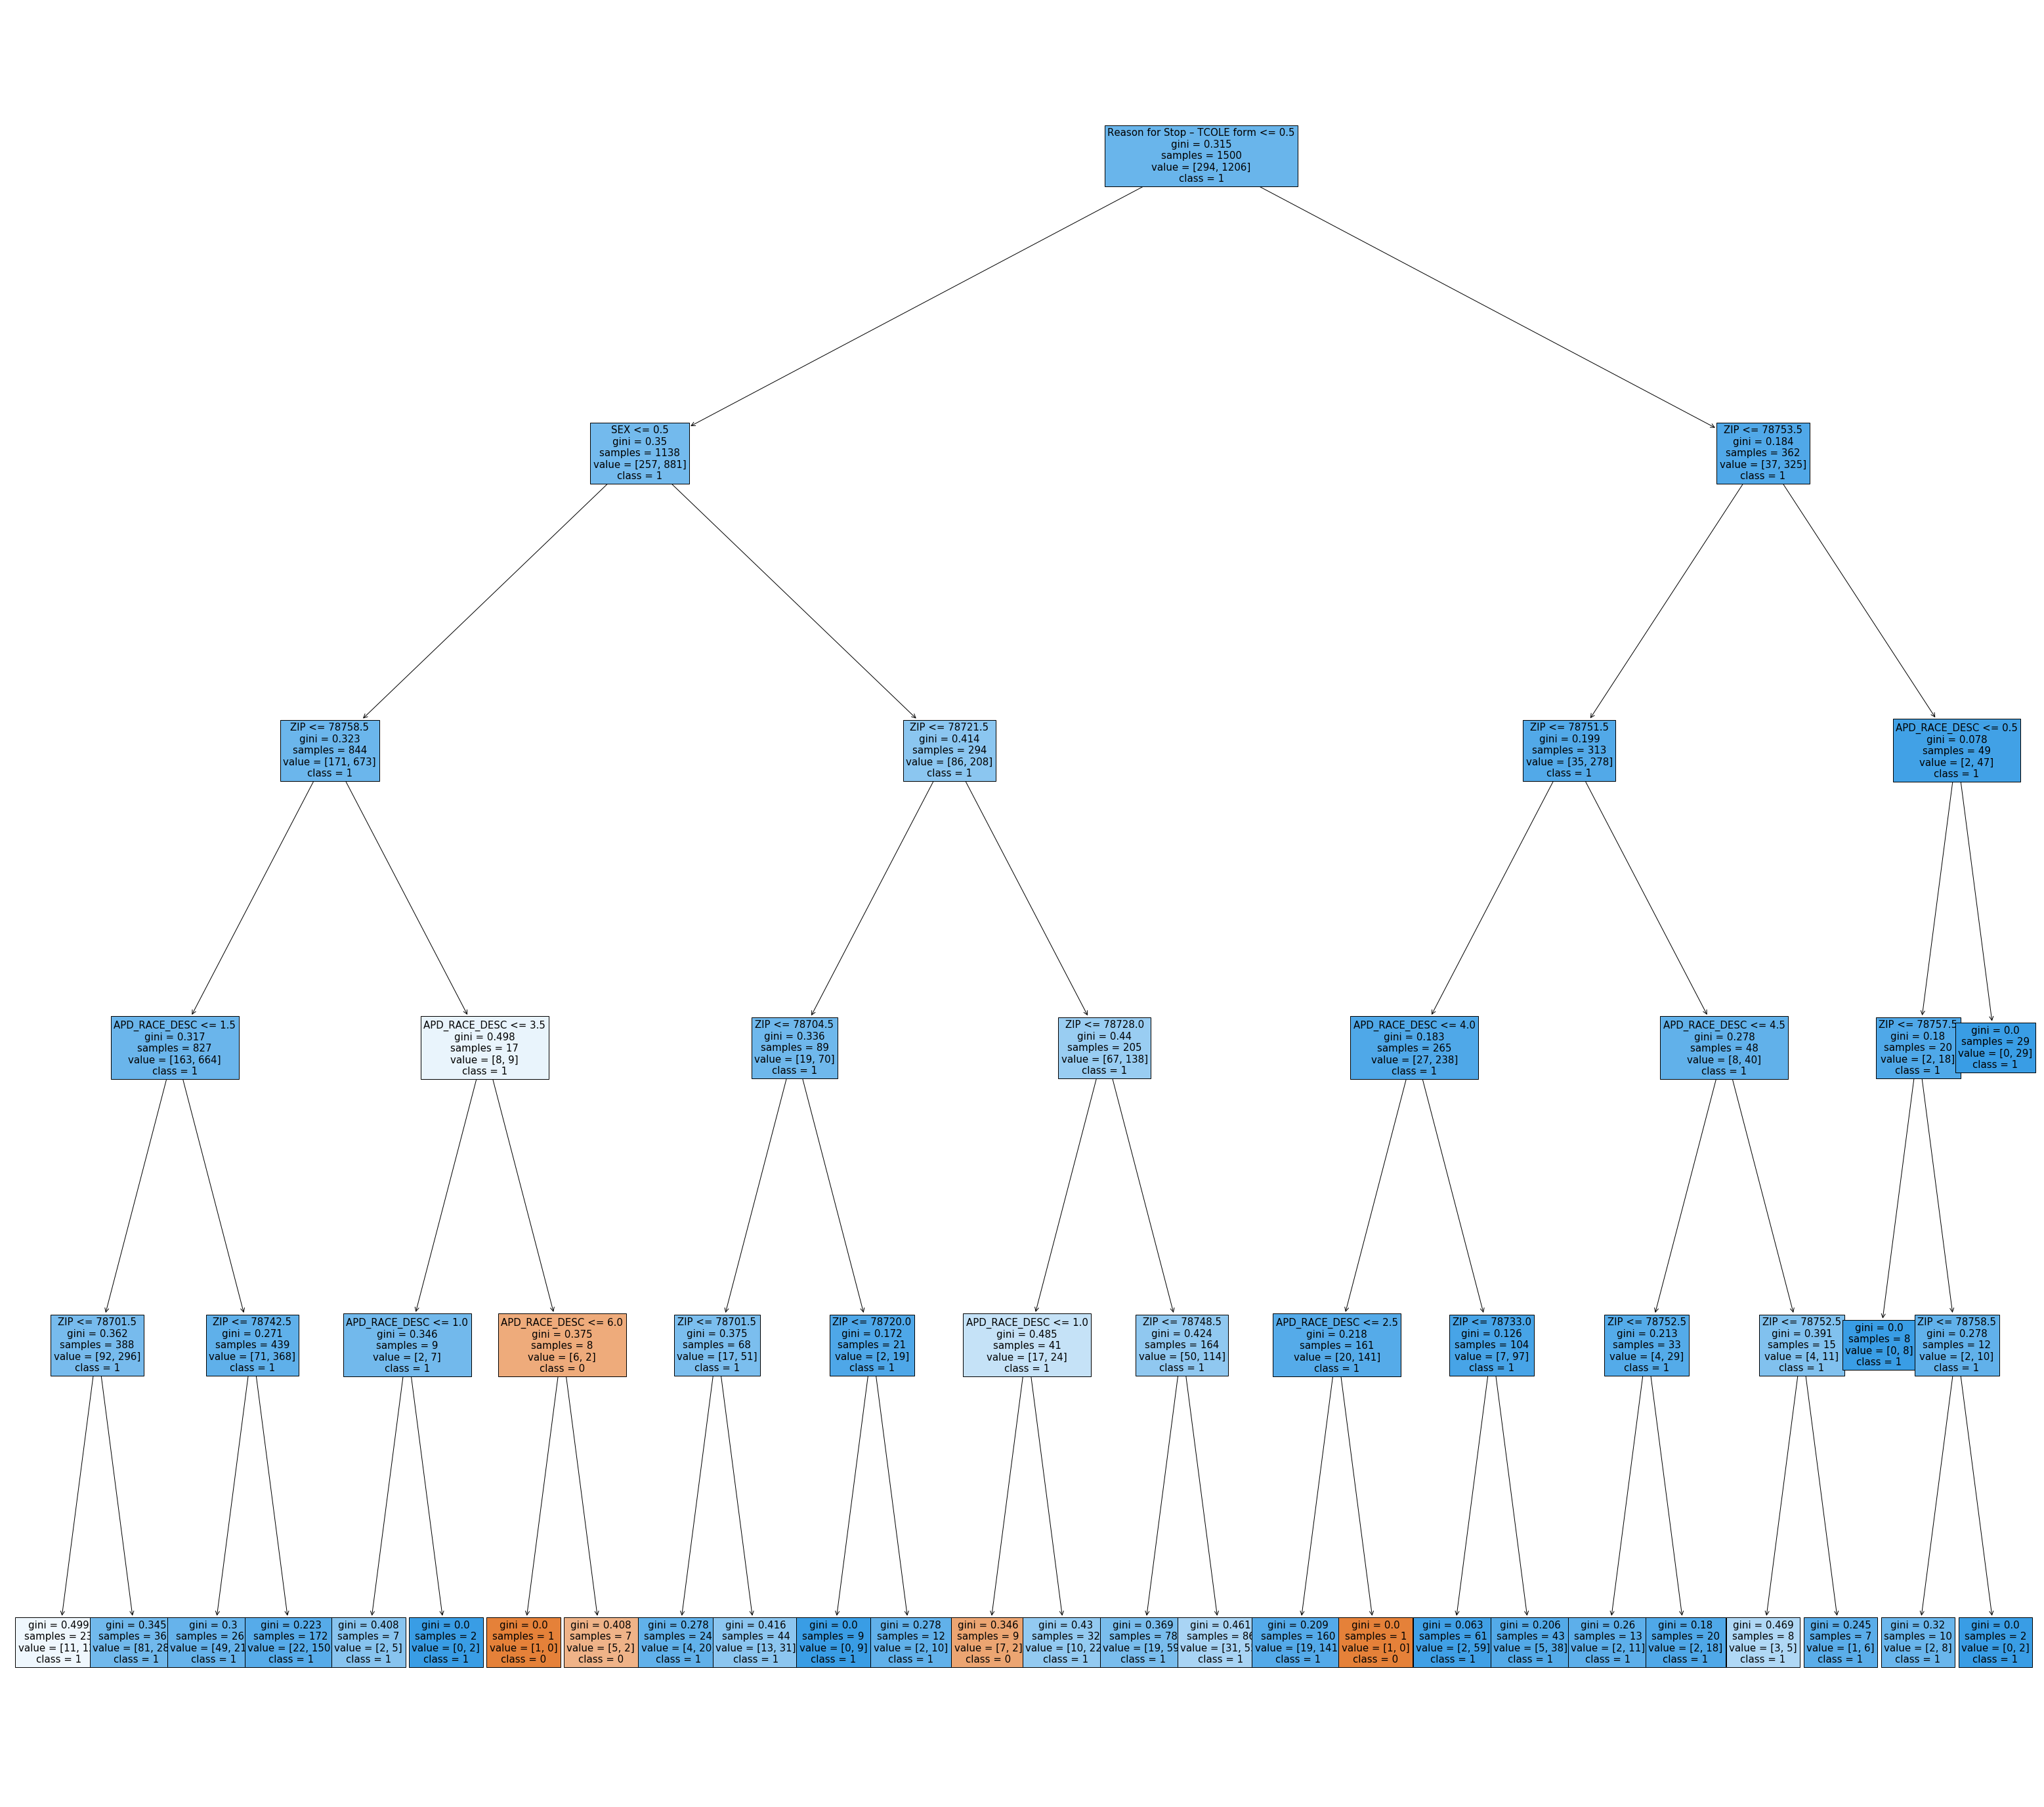

In [18]:
clsf = DCT(max_depth =5,random_state = 399)
clsf = clsf.fit(x_train,y_train)
pred = clsf.predict(x_test)
print('Acc:',metrics.accuracy_score(y_test,pred))
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(clsf, 
                   feature_names=df_x.columns,  
                   class_names=['0','1'],fontsize=15,
                   filled=True)


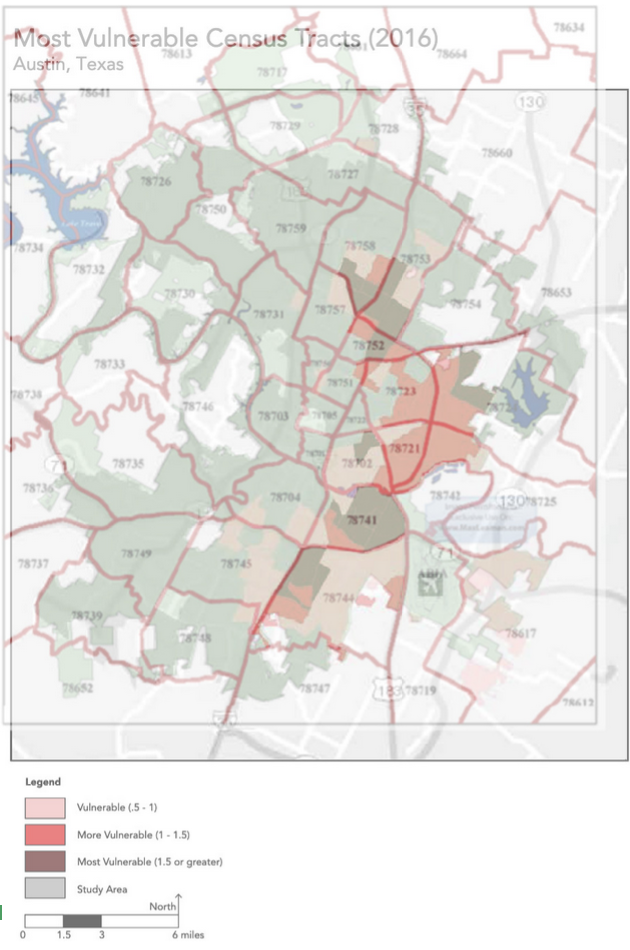

Conclusion: Based on the results of the model, we can see that there was a significant linkage between zip code, race and traffic stop searches. From the Decision Tree we can see that traffic stops occurring between 78702 and 78704 resulted in traffic stops the majority of the time. From the map of Austin above we can see that these zip codes were identified as vulnerable to gentrification, supporting our hypothesis and demonstrating a link between traffic stop searches and areas undergoing gentrification. The reverse is shown to be true, with areas not vulnerable to gentrification seeing a lower likelihood of traffic stop searches. This is especially evident when looking at zip codes above 78758 for example. We can see that if a traffic stop was made in the zip code location 78759 (a primarily white middle class zip code with a median family income of $119,000), the data shows that traffic stops involving minorities are significantly more likely to result in a search than those involving white individuals.

Our model satisfied our 70% accuracy threshold as it reached 80%. In order to improve this model we could potentially increase the size of the dataset to normalize the data within it. We could also add a new data column specifying the gentrification vulnerability level of the zip code so it could act as a new variable with which to make decisions within our model, possibly increasing the accuracy of it. We could also introduce class weights in order to prioritize different features, such as zip code or race.

In [19]:
def vulnerable(x):
    if int(x) in [78745,78723,78724,78753,78744,78758,78752,78702,78721,78741]:
      return 1
    else:
      return 0

df_x['Vulnerability'] = df_x['ZIP'].apply(lambda x:vulnerable(x))
df_x = df_x.drop(columns = ['ZIP'])

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size = 0.25, random_state = 99)
clsf = DCT(max_depth =5,random_state = 399)
clsf = clsf.fit(x_train,y_train)
pred = clsf.predict(x_test)
print('Acc:',metrics.accuracy_score(y_test,pred))

Acc: 0.804


In [20]:
big_x = dfX.drop(columns = ['Person Search YN','APD_sector','Unix','CENSUS_TRACT','CouncilDistrict','RACE_KNOWN'])
big_y = dfX['Person Search YN']
x_train,x_test,y_train,y_test = train_test_split(big_x,big_y, test_size = 0.25, random_state = 99)
clsf = DCT(max_depth =5,random_state = 399)
clsf = clsf.fit(x_train,y_train)
pred = clsf.predict(x_test)
print('Acc:',metrics.accuracy_score(y_test,pred))

Acc: 0.8270676691729323


Both changes applied above increased accuracy, and we expect that adding weights would do the same.

Resources: 
https://www.incomebyzipcode.com/texas/78759

https://sites.utexas.edu/gentrificationproject/files/2018/10/part2.pdf